In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import add
_c = pd.read_csv('color.csv')['color'].values

### Sensitivity: Budget Importance

In [11]:
def superscript_text(text):
    superscript_map = {
        '0': '⁰', '1': '¹', '2': '²', '3': '³', '4': '⁴',
        '5': '⁵', '6': '⁶', '7': '⁷', '8': '⁸', '9': '⁹',
        'a': 'ᵃ', 'b': 'ᵇ', 'c': 'ᶜ', 'd': 'ᵈ', 'e': 'ᵉ',
        'f': 'ᶠ', 'g': 'ᵍ', 'h': 'ʰ', 'i': 'ⁱ', 'j': 'ʲ',
        'k': 'ᵏ', 'l': 'ˡ', 'm': 'ᵐ', 'n': 'ⁿ', 'o': 'ᵒ',
        'p': 'ᵖ', 'q': 'ᵠ', 'r': 'ʳ', 's': 'ˢ', 't': 'ᵗ',
        'u': 'ᵘ', 'v': 'ᵛ', 'w': 'ʷ', 'x': 'ˣ', 'y': 'ʸ',
        'z': 'ᶻ', '+': '⁺', '-': '⁻', '=': '⁼', '(': '⁽',
        ')': '⁾', '/': '⁄', ' ': ' ', 'R': ''
    }
    return ''.join(superscript_map.get(char, char) for char in text.lower())
gamma_symbol = '\u03B3'

In [36]:
j = 2
com = ['Sunnyside', 'Dove Springs', 'Rogers Washington'][j]
color = ['#F4B183', '#8FAADC', '#209665'][j]
data = pd.read_csv(f'{type} {com}-report.csv')
bm = data['Settings'] == 'Budget'
vm = data['Settings'] == 'VoLL'
tm = data['Settings'] == 'Trans'
ty = data['Settings'] == 'Year'
em = data['Settings'] == 'Eprice'
pvm = data['Settings'] == 'PVprice'
RM1, RM2, RM3, RM4 = 'Impact Endurance', 'Sustained Access', 'Load Assurance', 'Peak Assurance'

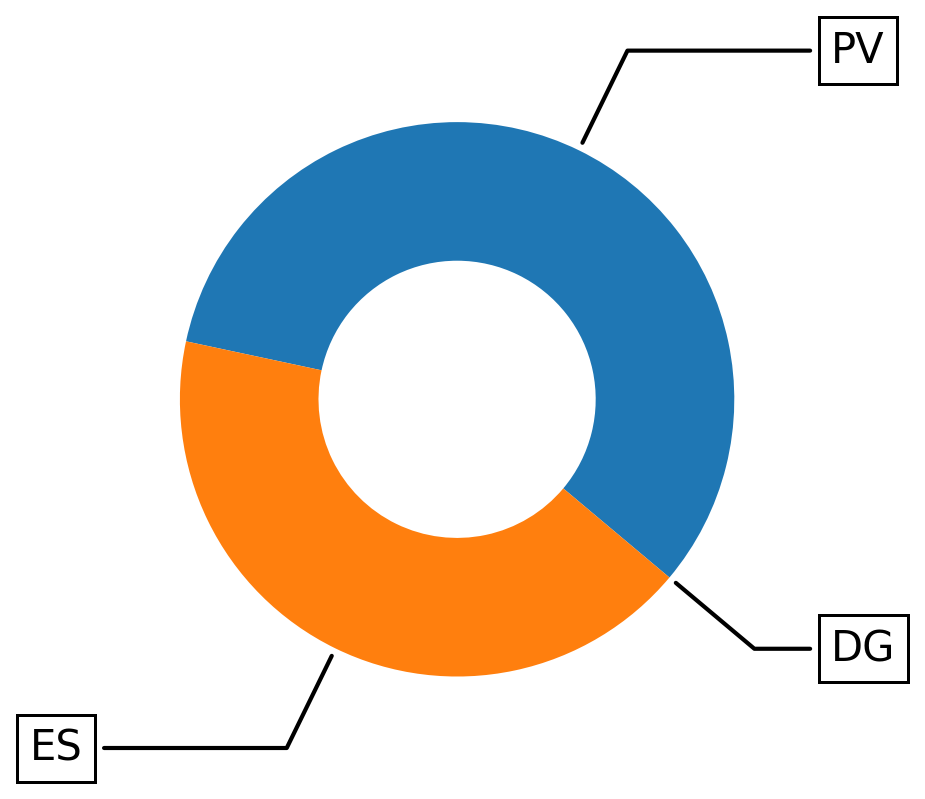

In [214]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"), dpi=300)

recipe = ['PV', 'ES', 'DG']

values = [300*(data['ES1'].iloc[0]+data['ES2'].iloc[0]), 2780*(data['PV1'].iloc[0]+data['PV2'].iloc[0])/4, 400*(data['DG1'].iloc[0]+data['DG2'].iloc[0])]

wedges, texts = ax.pie(values, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.savefig(f'../IMG/device share {com}.jpg', bbox_inches='tight')

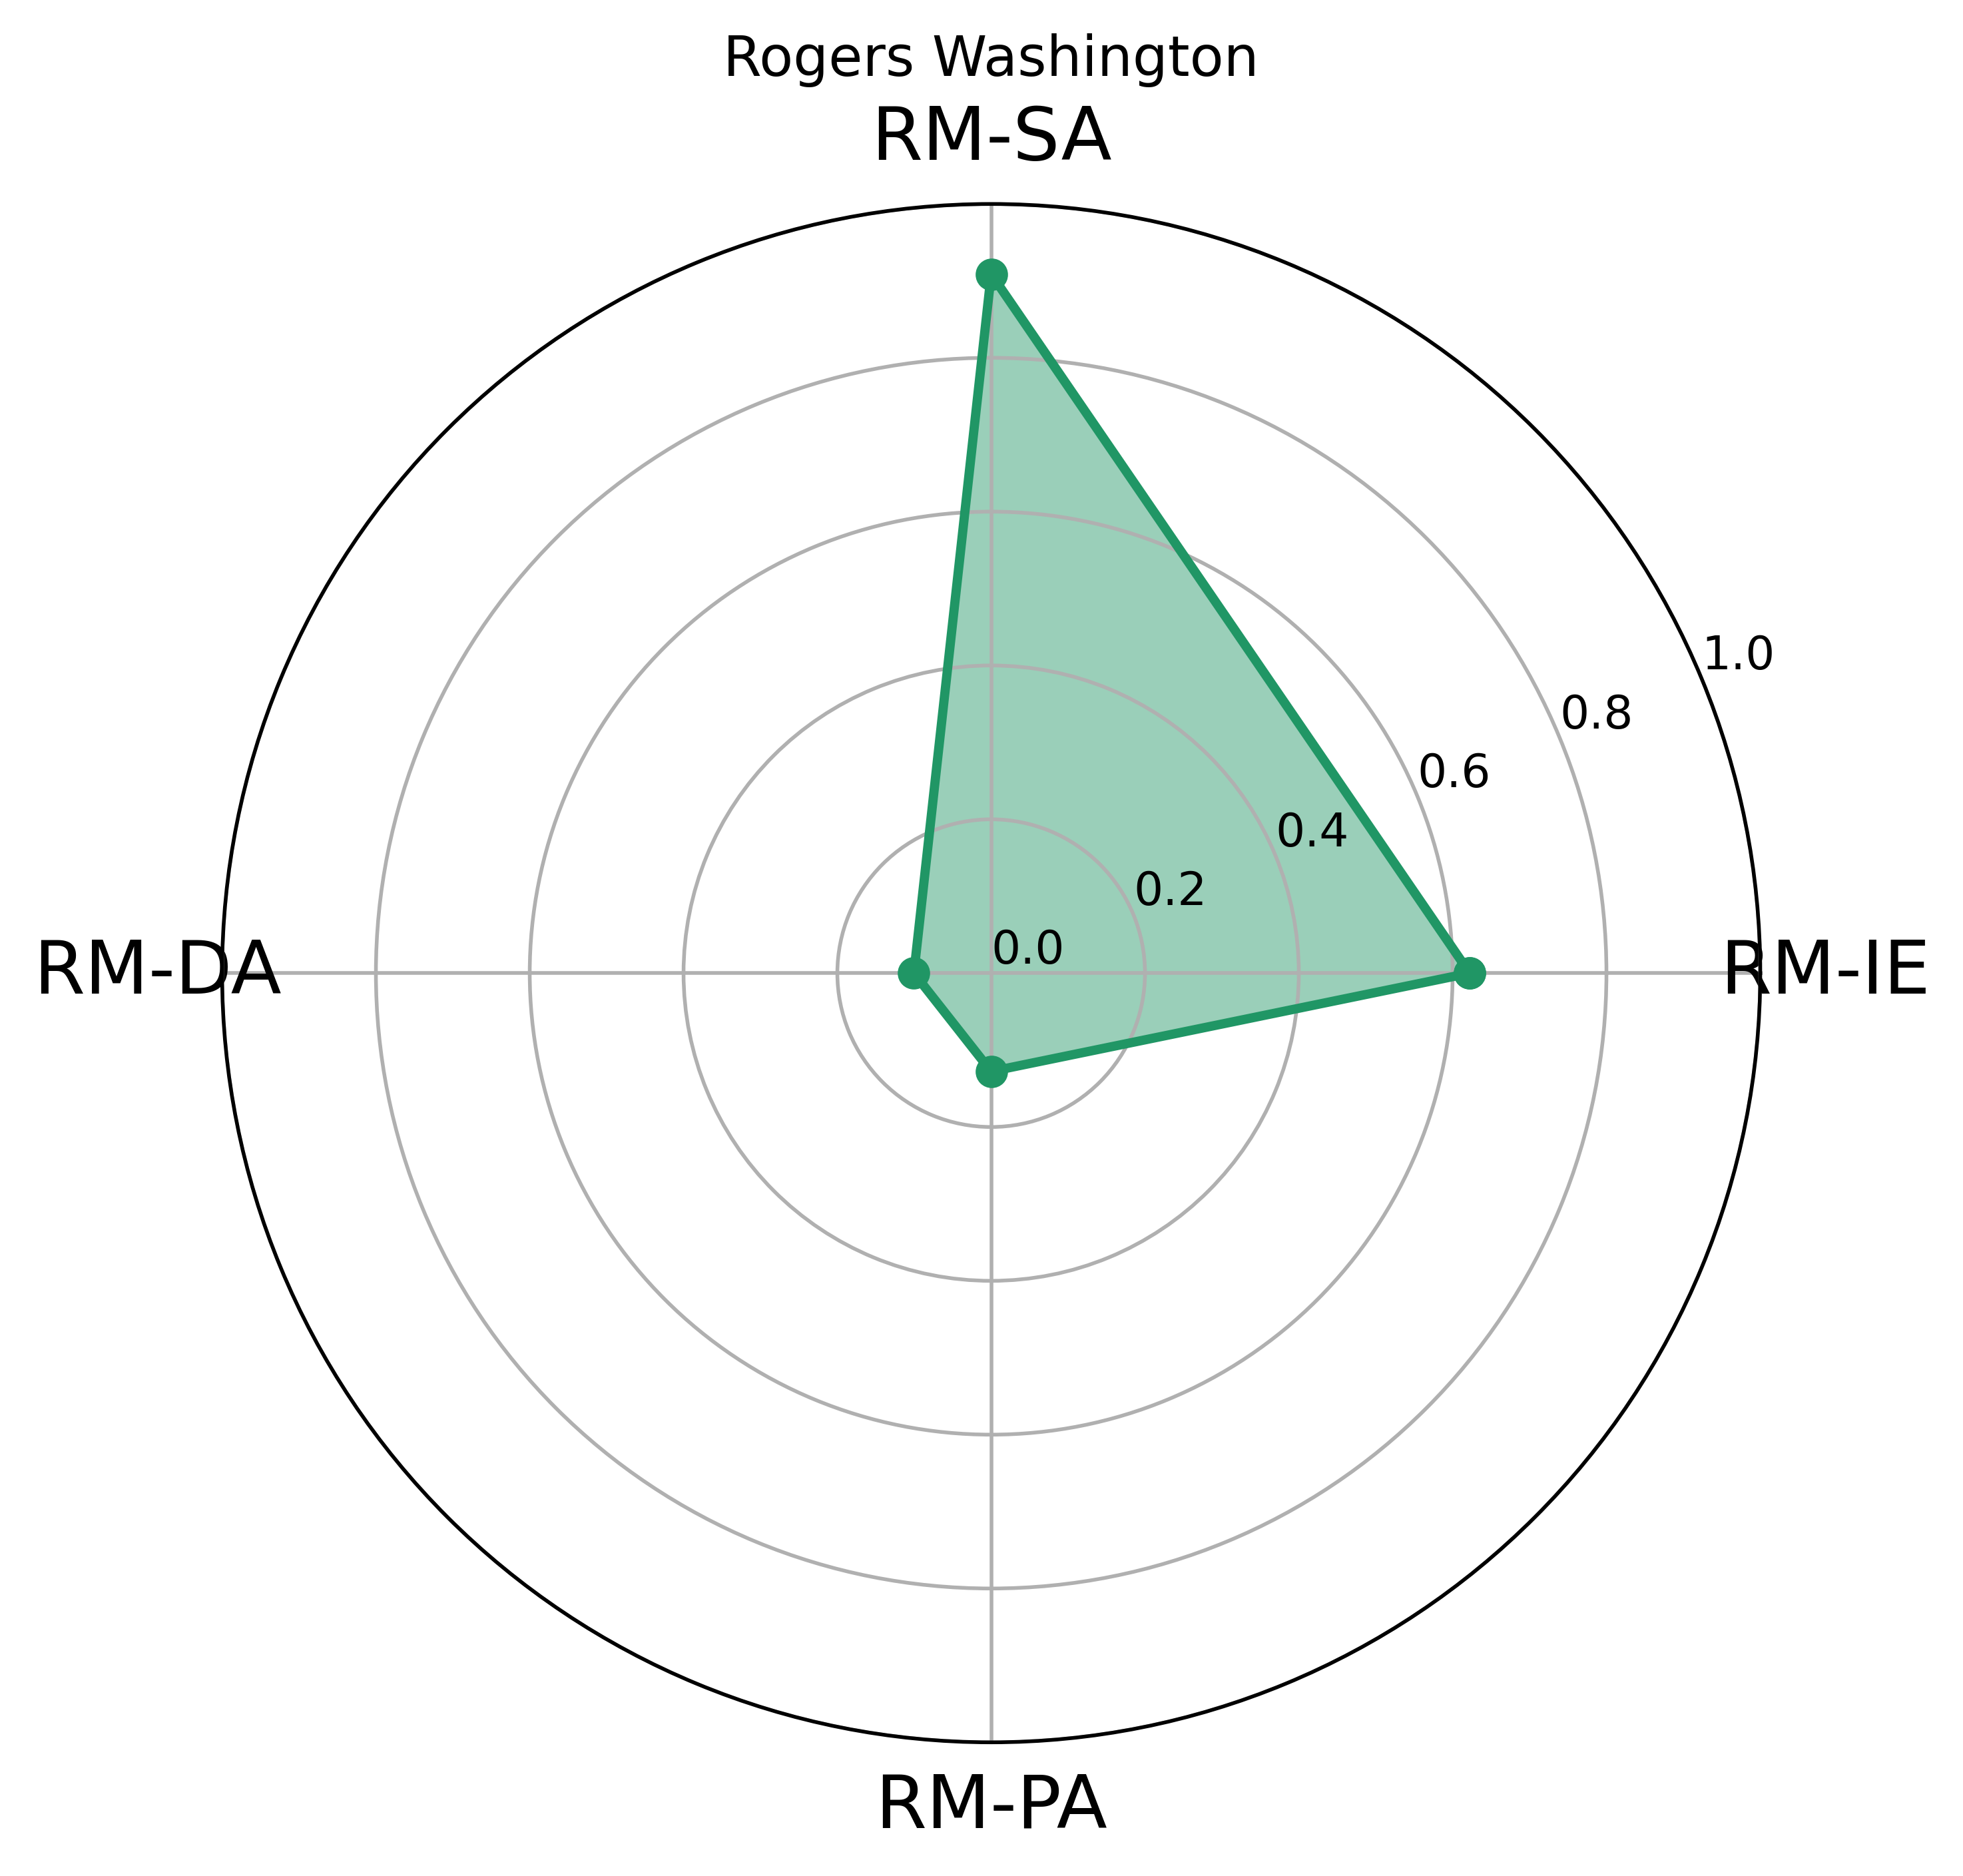

In [37]:
# Define the labels for each metric
labels = ['RM-IE', 'RM-SA', 'RM-DA', 'RM-PA']

# Define the values for each metric (example values)
values = [data[RM1].iloc[0], data[RM2].iloc[0], data[RM3].iloc[0], data[RM4].iloc[0]]

# Calculate the angle for each metric
angles = np.linspace(0, 2 * np.pi, 4, endpoint=False).tolist()

# Make the plot close to a circle
values += values[:1]
angles += angles[:1]

# Plot the data
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True), dpi=500)
ax.fill(angles, values, color=color, alpha=0.45)
ax.plot(angles, values, marker='o', color=color, linewidth=2)  # Line plot for better visualization
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])  # Remove radial labels

# Add labels with increased font size
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=16, color='black')  # Set font size to 12

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Add a title
plt.title(f'{com}')

# Show the plot
plt.savefig(f'../IMG/{com}-Resilience_Metrics.jpg', bbox_inches='tight')

### Sensitivity Chart

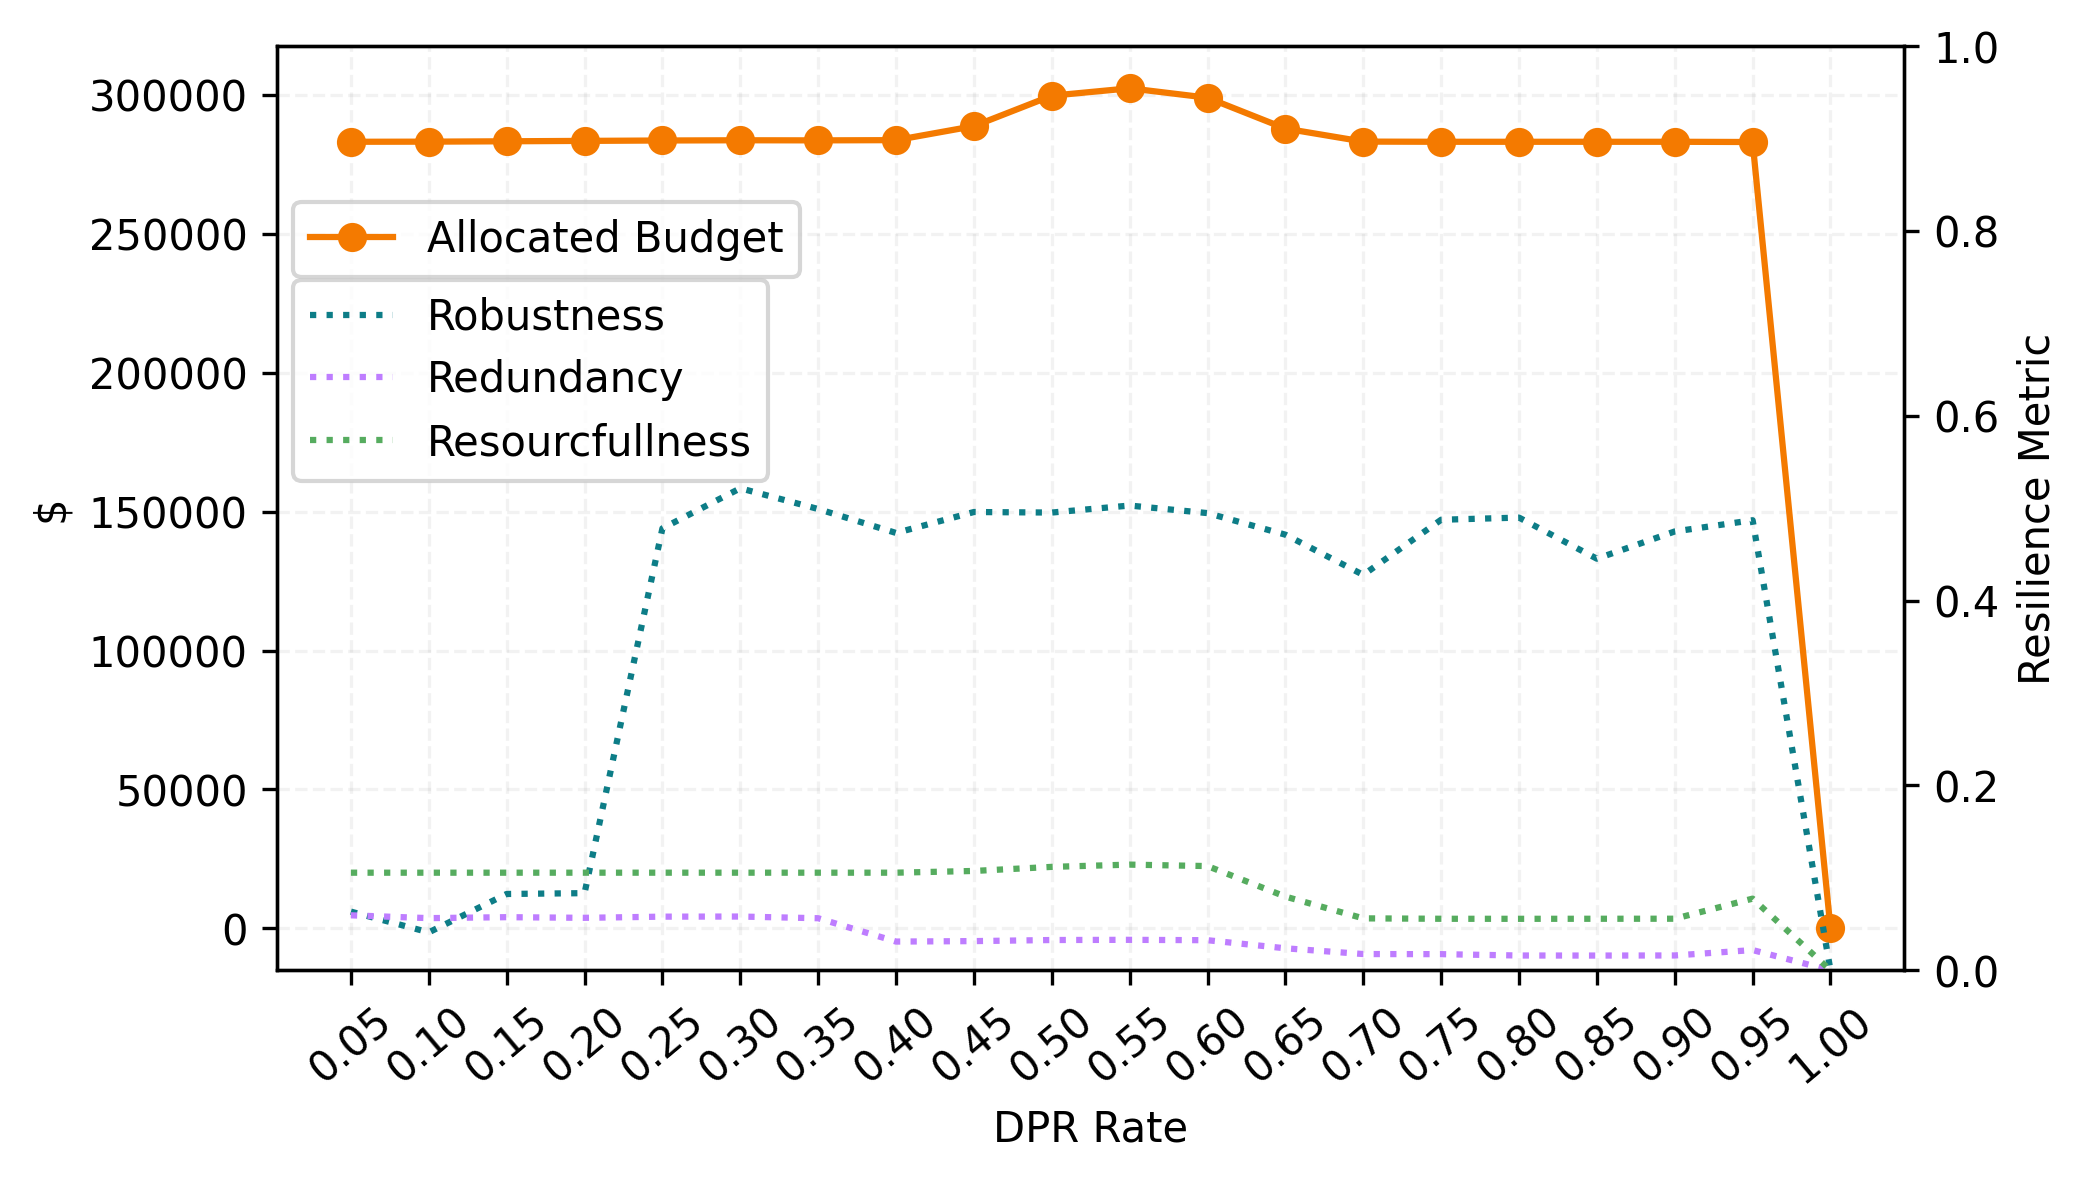

In [29]:
_inv = data[tm]['Investment'] + data[tm]['Reinvestment']
_rng = data[tm]['Value']
_res = [data[tm]['Robustness'], data[tm]['Redundancy'], data[tm]['Resourcefulness']]
fig1 = plt.figure(figsize=(7, 4), dpi=300)
plt.plot(_rng, _inv, c=_c[0], marker='o', label='Allocated Budget')
plt.ylabel('$')
plt.xlabel('DPR Rate')
plt.xticks(np.linspace(0.05,1,20), rotation=40)
plt.legend(loc=(0.01,0.75))
plt.grid(color='gray', linestyle='--', alpha=0.1)

ax1 = plt.twinx()
ax1.plot(_rng, _res[0], c=_c[1], label='Robustness', linestyle=':')
ax1.plot(_rng, _res[1], c=_c[2], label='Redundancy', linestyle=':')
ax1.plot(_rng, _res[2], c=_c[3], label='Resourcfullness', linestyle=':')
ax1.set_ylim([0, 1])
ax1.set_ylabel('Resilience Metric')
ax1.legend(loc=(0.01,0.53))

plt.savefig(f'../IMG/Inv vs DRP {com}.jpg', bbox_inches='tight')

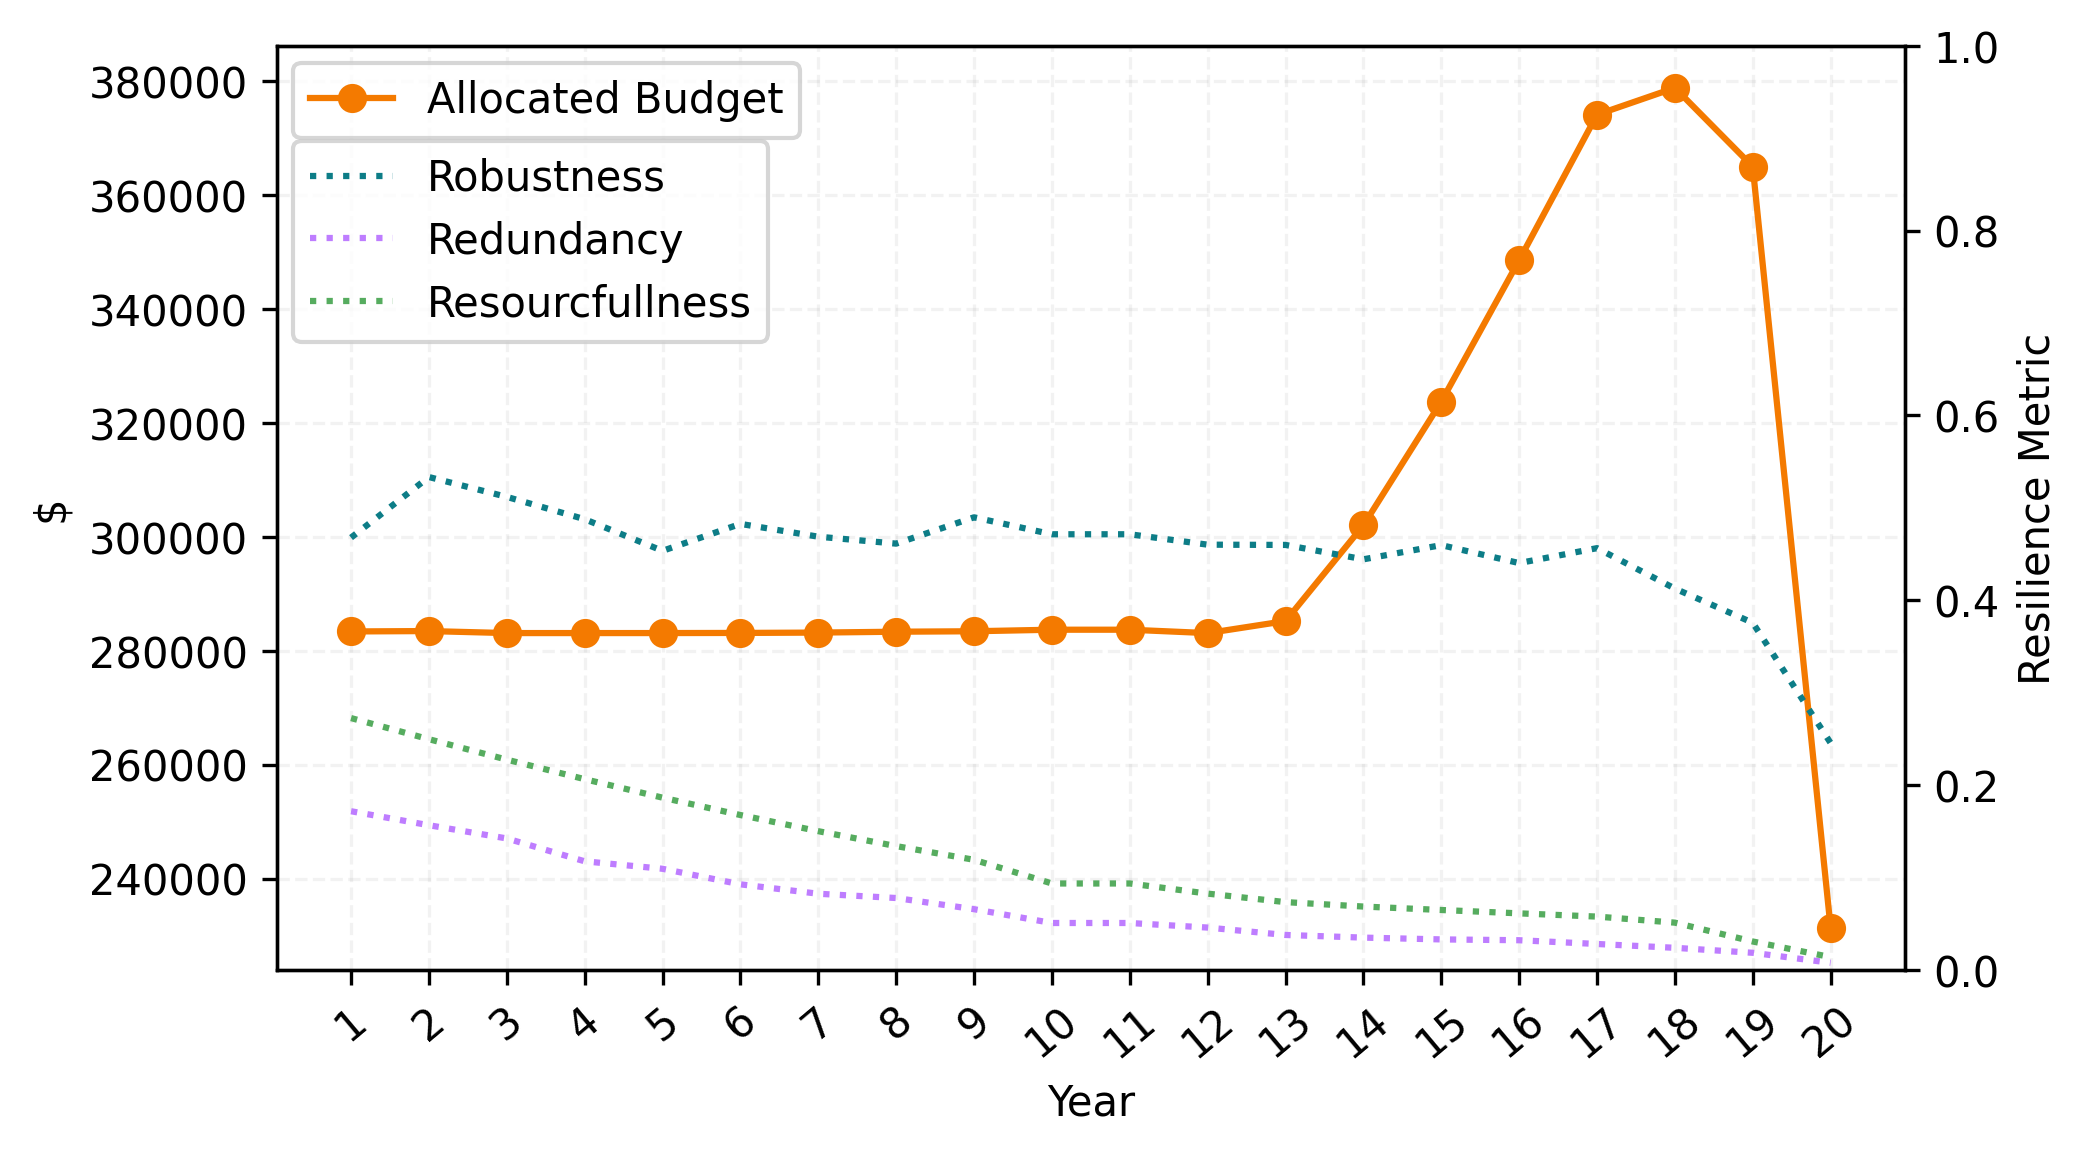

In [34]:
_inv = data[ty]['Investment'] + data[ty]['Reinvestment']
_rng = data[ty]['Value']
_res = [data[ty]['Robustness'], data[ty]['Redundancy'], data[ty]['Resourcefulness']]
fig2 = plt.figure(figsize=(7, 4), dpi=300)
plt.plot(_rng, _inv, c=_c[0], marker='o', label='Allocated Budget')
plt.ylabel('$')
plt.xlabel('Year')
plt.xticks(np.linspace(1,20,20), rotation=40)
plt.legend(loc=(0.01,0.9))
plt.grid(color='gray', linestyle='--', alpha=0.1)

ax1 = plt.twinx()
ax1.plot(_rng, _res[0], c=_c[1], label='Robustness', linestyle=':')
ax1.plot(_rng, _res[1], c=_c[2], label='Redundancy', linestyle=':')
ax1.plot(_rng, _res[2], c=_c[3], label='Resourcfullness', linestyle=':')
ax1.set_ylim([0, 1])
ax1.set_ylabel('Resilience Metric')
ax1.legend(loc=(0.01,0.68))

plt.savefig(f'../IMG/Inv vs Year {com}.jpg', bbox_inches='tight')

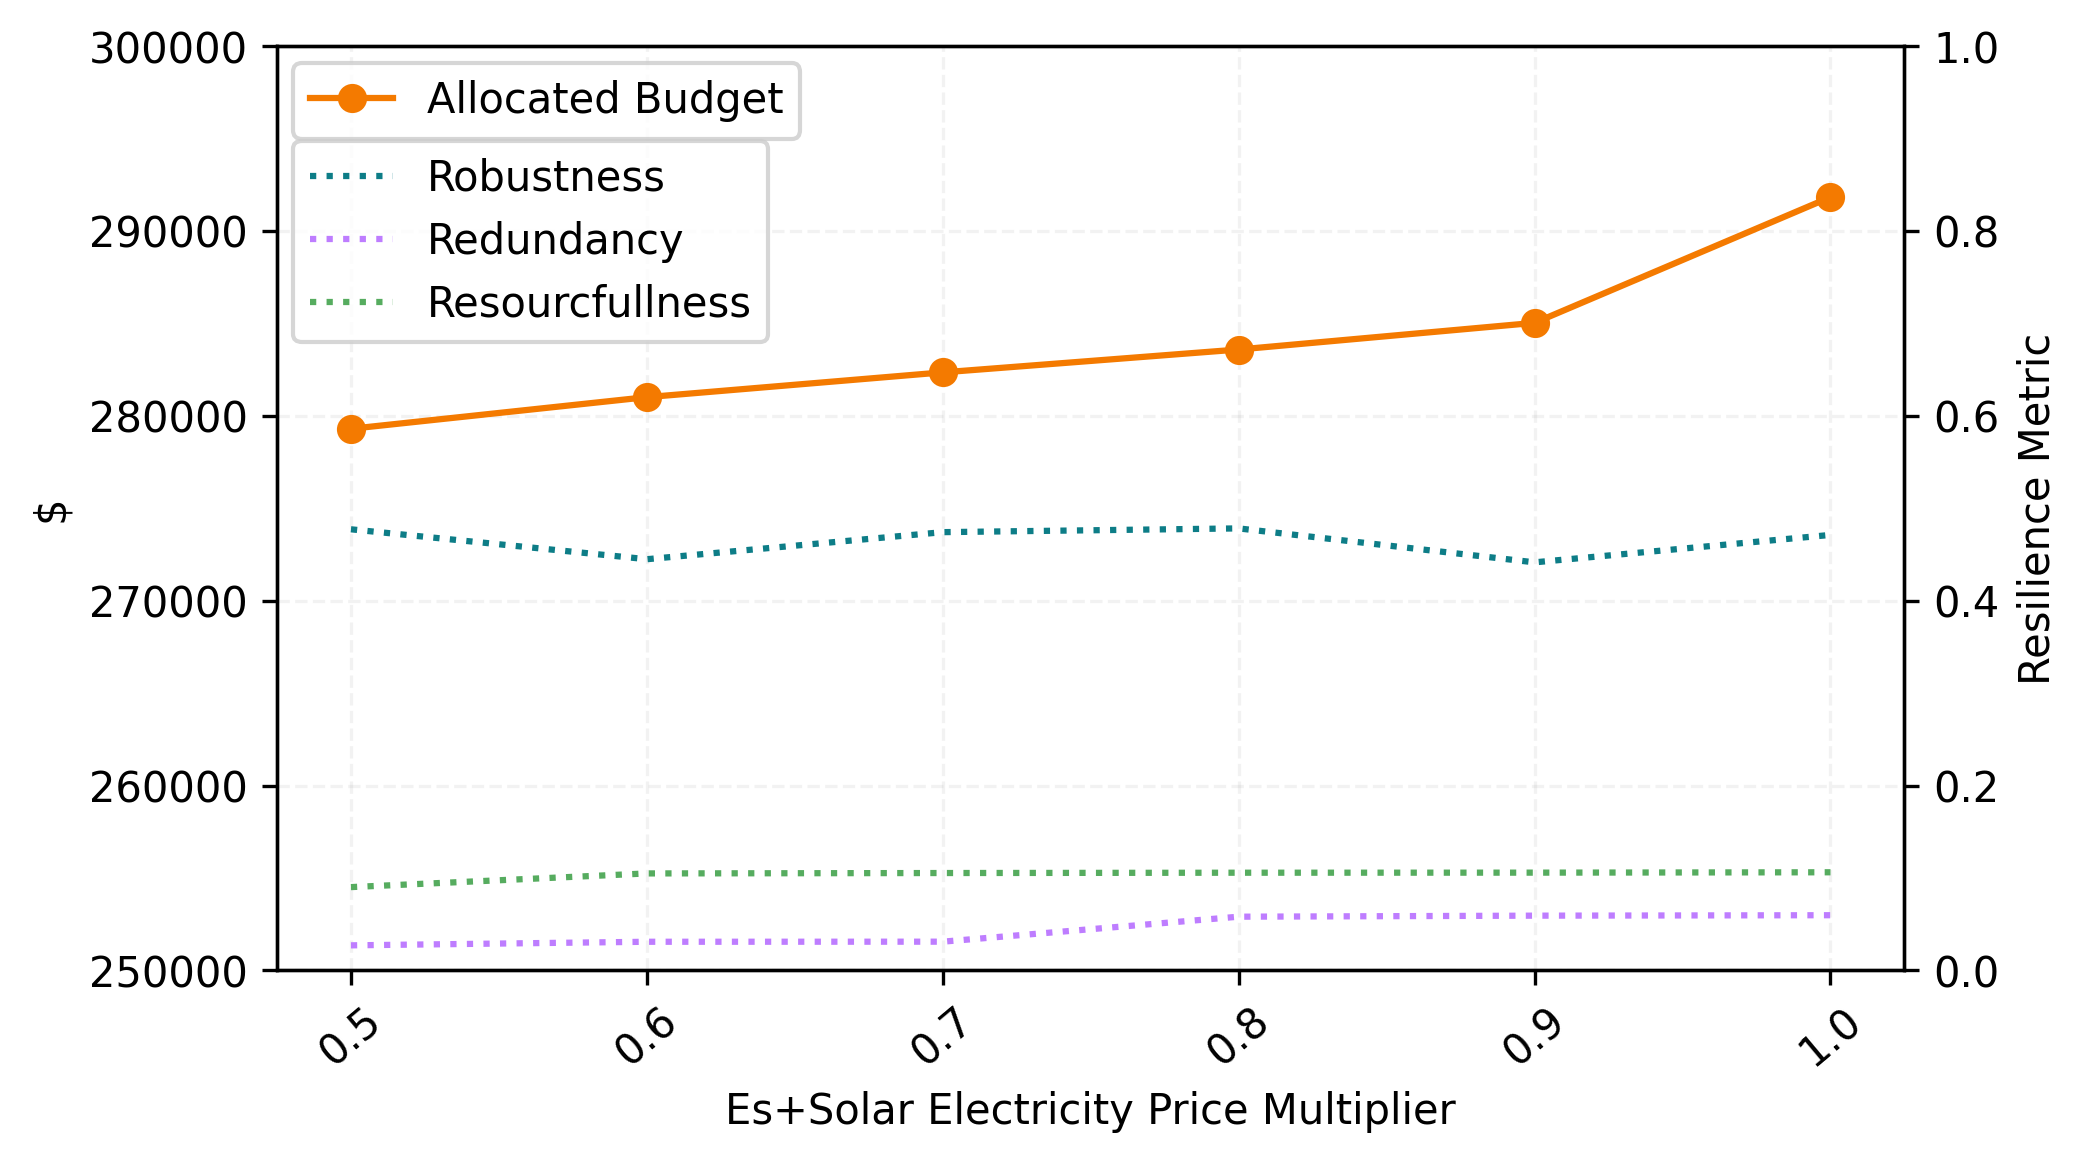

In [221]:
_inv = data[em]['Investment'] + data[em]['Reinvestment']
_rng = data[em]['Value']
_res= [data[em]['Robustness'], data[em]['Redundancy'], data[em]['Resourcefulness']]
fig3 = plt.figure(figsize=(7, 4), dpi=300)
plt.plot(_rng, _inv, c=_c[0], marker='o', label='Allocated Budget')
plt.ylabel('$')
plt.xlabel('Es+Solar Electricity Price Multiplier')
plt.xticks(np.linspace(0.5,1,6), rotation=40)
plt.legend(loc=(0.01, 0.9))
plt.ylim([250000, 300000])
plt.grid(color='gray', linestyle='--', alpha=0.1)

ax1 = plt.twinx()
ax1.plot(_rng, _res[0], c=_c[1], label='Robustness', linestyle=':')
ax1.plot(_rng, _res[1], c=_c[2], label='Redundancy', linestyle=':')
ax1.plot(_rng, _res[2], c=_c[3], label='Resourcfullness', linestyle=':')
ax1.set_ylim([0, 1])
ax1.set_ylabel('Resilience Metric')
ax1.legend(loc=(0.01, 0.68))

plt.savefig(f'../IMG/Inv vs Eprice {com}.jpg', bbox_inches='tight')

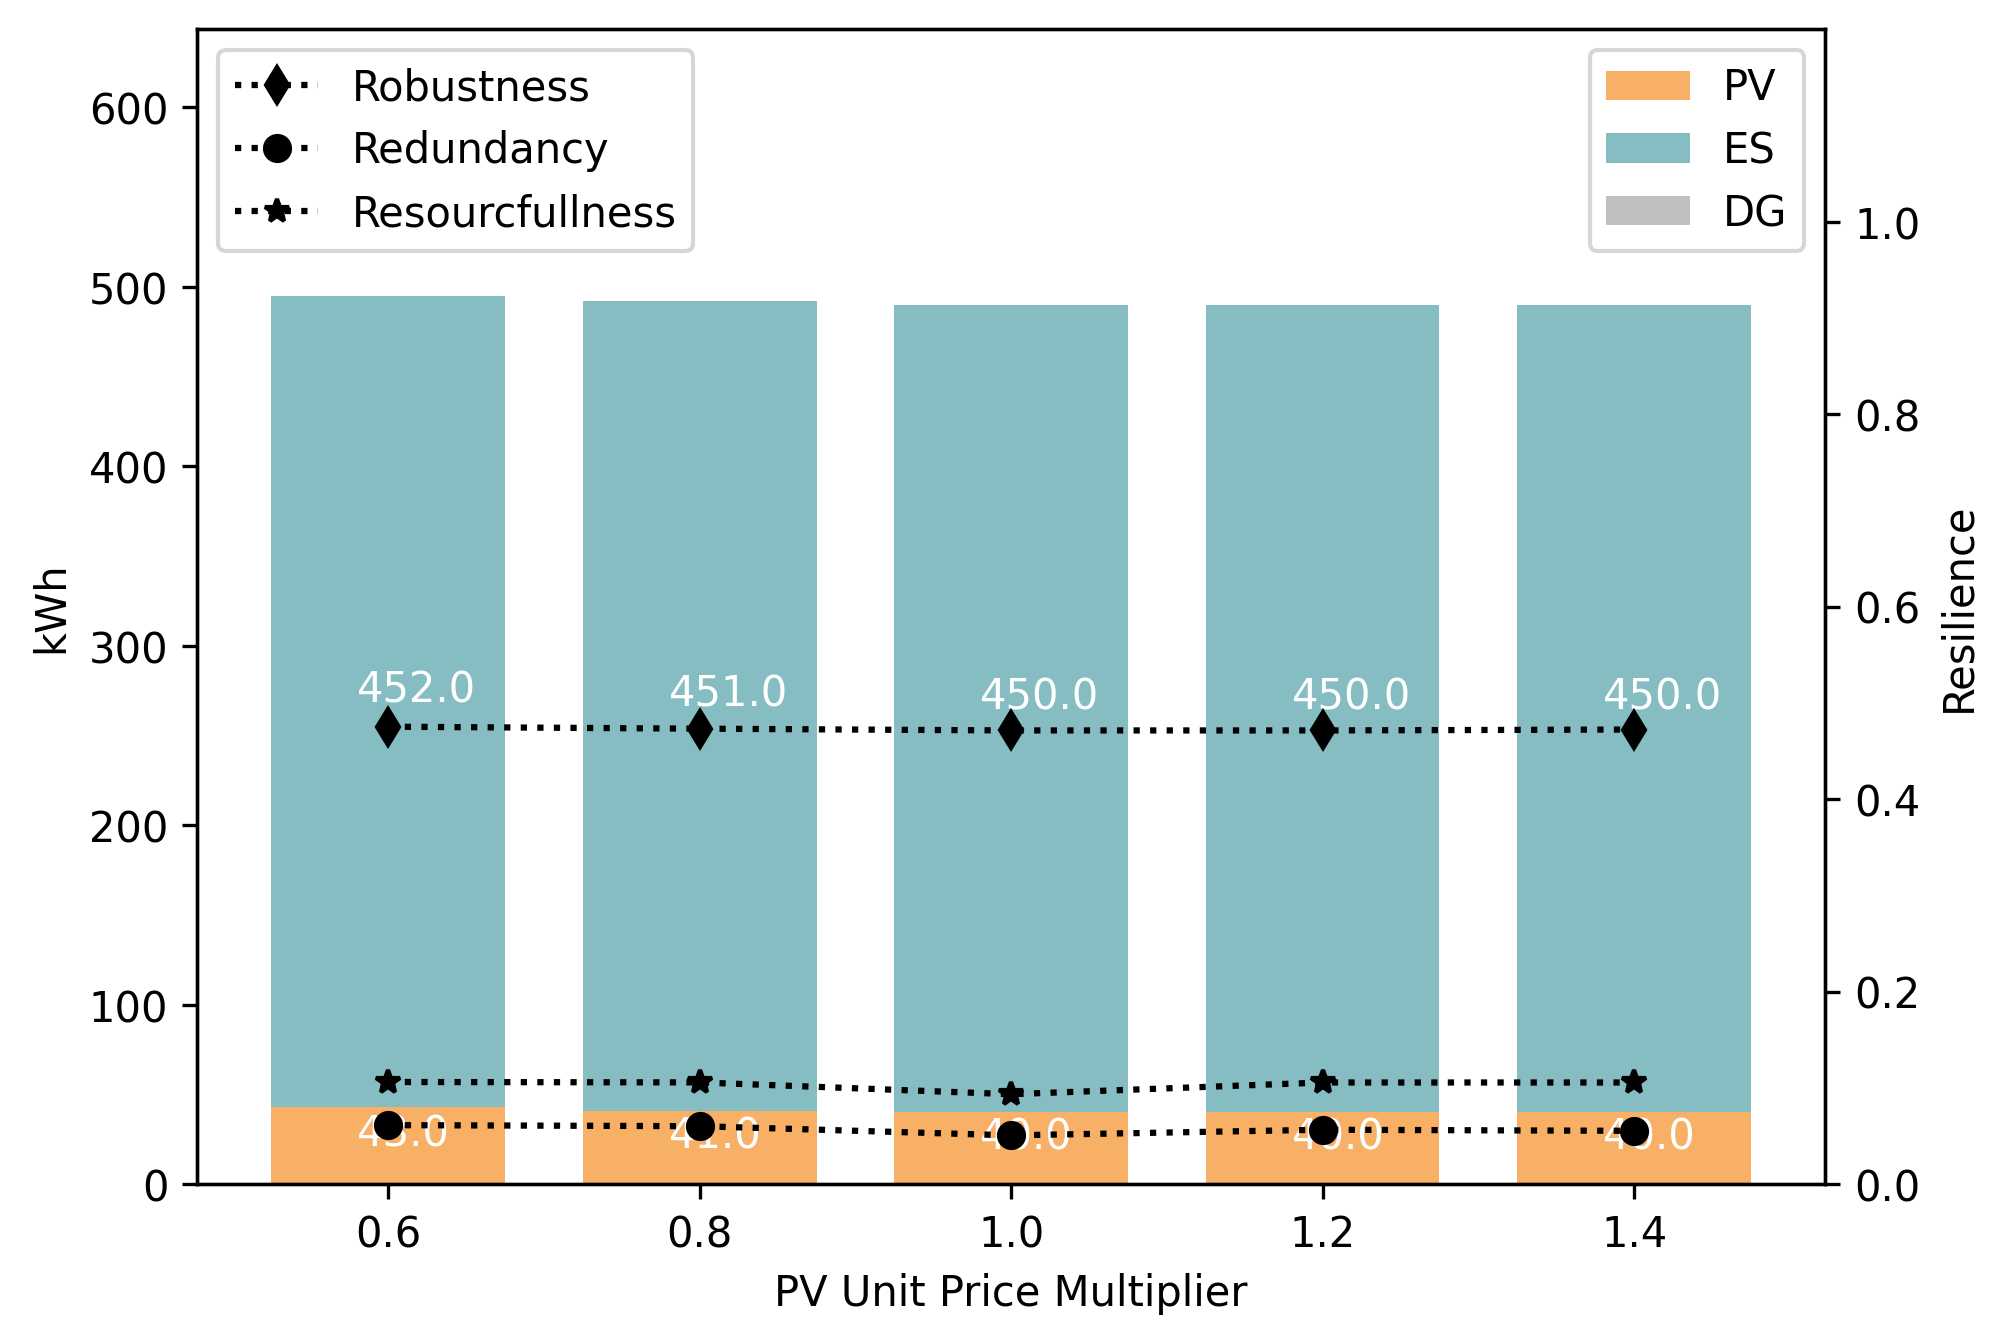

In [178]:
_PV = list(data[pvm]['PV1'] + data[pvm]['PV2'])
_ES = list(data[pvm]['ES1'] + data[pvm]['ES2'])
_DG = list(data[pvm]['DG1'] + data[pvm]['DG2'])
_rng = list(data[pvm]['Value'])

fig = plt.figure(figsize=(7, 5), dpi=300)
plt.bar(_rng, _PV, width=0.15, align='center', color=_c[0], label='PV', alpha=0.6)
plt.bar(_rng, _ES, bottom=_PV, width=0.15, align='center', color=_c[1], label='ES', alpha=0.5)
plt.bar(_rng, _DG, width=0.15, align='center', color=_c[7], label='DG', alpha=0.5)
plt.ylabel('kWh')
plt.xlabel('PV Unit Price Multiplier')
plt.ylim([0, 1.3*max(map(add, _PV, _ES))])
plt.legend()
for bar,i in zip(_rng, range(len(_rng))):
    plt.text(x=bar-0.02, y=_PV[i]/2, s=str(_PV[i]), color='white')
    plt.text(x=bar-0.02, y=_ES[i]/2+_PV[i], s=str(_ES[i]), color='white')
    
    
ax = plt.twinx()
ax.plot(_rng, data[pvm]['Robustness'], c='black', marker='d', linestyle=':', label='Robustness')
ax.plot(_rng, data[pvm]['Redundancy'],  c='black', marker='o', linestyle=':', label='Redundancy')
ax.plot(_rng, data[pvm]['Resourcefulness'],  c='black', marker='*', linestyle=':', label='Resourcfullness')
ax.set_ylim([0,1.2])
ax.set_ylabel('Resilience')
ax.set_yticks([0,0.2,0.4,0.6,0.8, 1])
ax.legend(loc='upper left')
plt.savefig(f'../IMG/Device Sensitivity-{com}', bbox_inches='tight')

In [36]:
def make_radar_chart(stats, x_range, param, color):
    fig = plt.figure(figsize=(15, 4), dpi=400)
    labels = [f'RM{superscript_text("rob")}', f'RM{superscript_text("Red")}', f'RM{superscript_text("Res")}']
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False) # generate angles
    angles = [(a + np.deg2rad(30)) % (2 * np.pi) for a in angles]
    angle = np.concatenate((angles,[angles[0]]))
    label =np.concatenate((labels,[labels[0]]))
    for i in range(len(x_range)):
        ax = fig.add_subplot(int(f'14{i+1}'), polar=True)
        stat = np.concatenate((stats[i],[stats[i][0]]))
        ax.plot(angle, stat, 'o-', linewidth=2, color=c[color], alpha=0.5)
        ax.fill(angle, stat, color=c[color], alpha=0.4)
        ax.set_thetagrids(angle * 180/np.pi, label)
        plt.ylim([0, 1.1])
        plt.yticks([0.2, 0.4, 0.6, 0.8])
        if param != 'Year':
            ax.set_title(f'{gamma_symbol}{superscript_text(param)}: {x_range[i]}')
        else:
            ax.set_title(f'm: {x_range[i]}')
        ax.grid(True)
    plt.savefig(f'../IMG/{type} {com}-Resilience Sensitivity-{param}.jpg', bbox_inches='tight')
    
    
'''make_radar_chart(stats=[[data[bm]['Robustness'].iloc[i], data[bm]['Redundancy'].iloc[i],	data[bm]['Resourcefulness'].iloc[i]]
                        for i in range(len(data[bm]))],
                        x_range=data[bm]['Value'].values,
                        param='Budget', color=1)
make_radar_chart(stats=[[data[vm]['Robustness'].iloc[i], data[vm]['Redundancy'].iloc[i], data[vm]['Resourcefulness'].iloc[i]]
                        for i in range(len(data[vm]))],
                        x_range=data[vm]['Value'].values,
                        param='VoLL', color=2)
make_radar_chart(stats=[[data[tm]['Robustness'].iloc[i], data[tm]['Redundancy'].iloc[i], data[tm]['Resourcefulness'].iloc[i]]
                        for i in range(len(data[tm]))],
                        x_range=data[tm]['Value'].values,
                        param='Trans', color=3)
make_radar_chart(stats=[[data[ty]['Robustness'].iloc[i], data[ty]['Redundancy'].iloc[i], data[ty]['Resourcefulness'].iloc[i]]
                        for i in range(len(data[ty]))],
                        x_range=data[ty]['Value'].values,
                        param='Year', color=4)'''

"make_radar_chart(stats=[[data[bm]['Robustness'].iloc[i], data[bm]['Redundancy'].iloc[i],\tdata[bm]['Resourcefulness'].iloc[i]]\n                        for i in range(len(data[bm]))],\n                        x_range=data[bm]['Value'].values,\n                        param='Budget', color=1)\nmake_radar_chart(stats=[[data[vm]['Robustness'].iloc[i], data[vm]['Redundancy'].iloc[i], data[vm]['Resourcefulness'].iloc[i]]\n                        for i in range(len(data[vm]))],\n                        x_range=data[vm]['Value'].values,\n                        param='VoLL', color=2)\nmake_radar_chart(stats=[[data[tm]['Robustness'].iloc[i], data[tm]['Redundancy'].iloc[i], data[tm]['Resourcefulness'].iloc[i]]\n                        for i in range(len(data[tm]))],\n                        x_range=data[tm]['Value'].values,\n                        param='Trans', color=3)\nmake_radar_chart(stats=[[data[ty]['Robustness'].iloc[i], data[ty]['Redundancy'].iloc[i], data[ty]['Resourcefulness'].iloc[

In [7]:
def Sensitivity(tables, params=None):
    plt.figure(figsize=(15, 9), dpi=300)
    for i in range(len(tables)):
        plt.subplot(2, 2, i+1)
        cols, color_i = tables[i].columns, 0
        y_max = 0
        for j in cols[1:]:
            plt.plot(tables[i][cols[0]], tables[i][j], marker='d', c=c[color_i], label=j)
            if y_max < int(np.max(tables[i][j].values)/1000000)+1:
                y_max = int(np.max(tables[i][j].values)/1000000)+1
            color_i+= 1
        split = {7: 21, 10: 19, 5: 18,4:17, 3:16, 2:11, 1:11}
        plt.xticks(tables[i][cols[0]])
        plt.yticks(np.linspace(0, y_max*1e6, split[y_max]), [f'{j:0.2f}M' for j in np.linspace(0, y_max, split[y_max])])
        plt.xlabel(f'{gamma_symbol}{superscript_text(params[i])}')
        plt.ylabel('Budget Spent ($)')
        plt.grid(True, which='both', color=c[-1], alpha=0.3)
        plt.legend()
    plt.savefig(f'../IMG/{type} {com}-Sensitivity_InvRein.jpg', bbox_inches='tight')

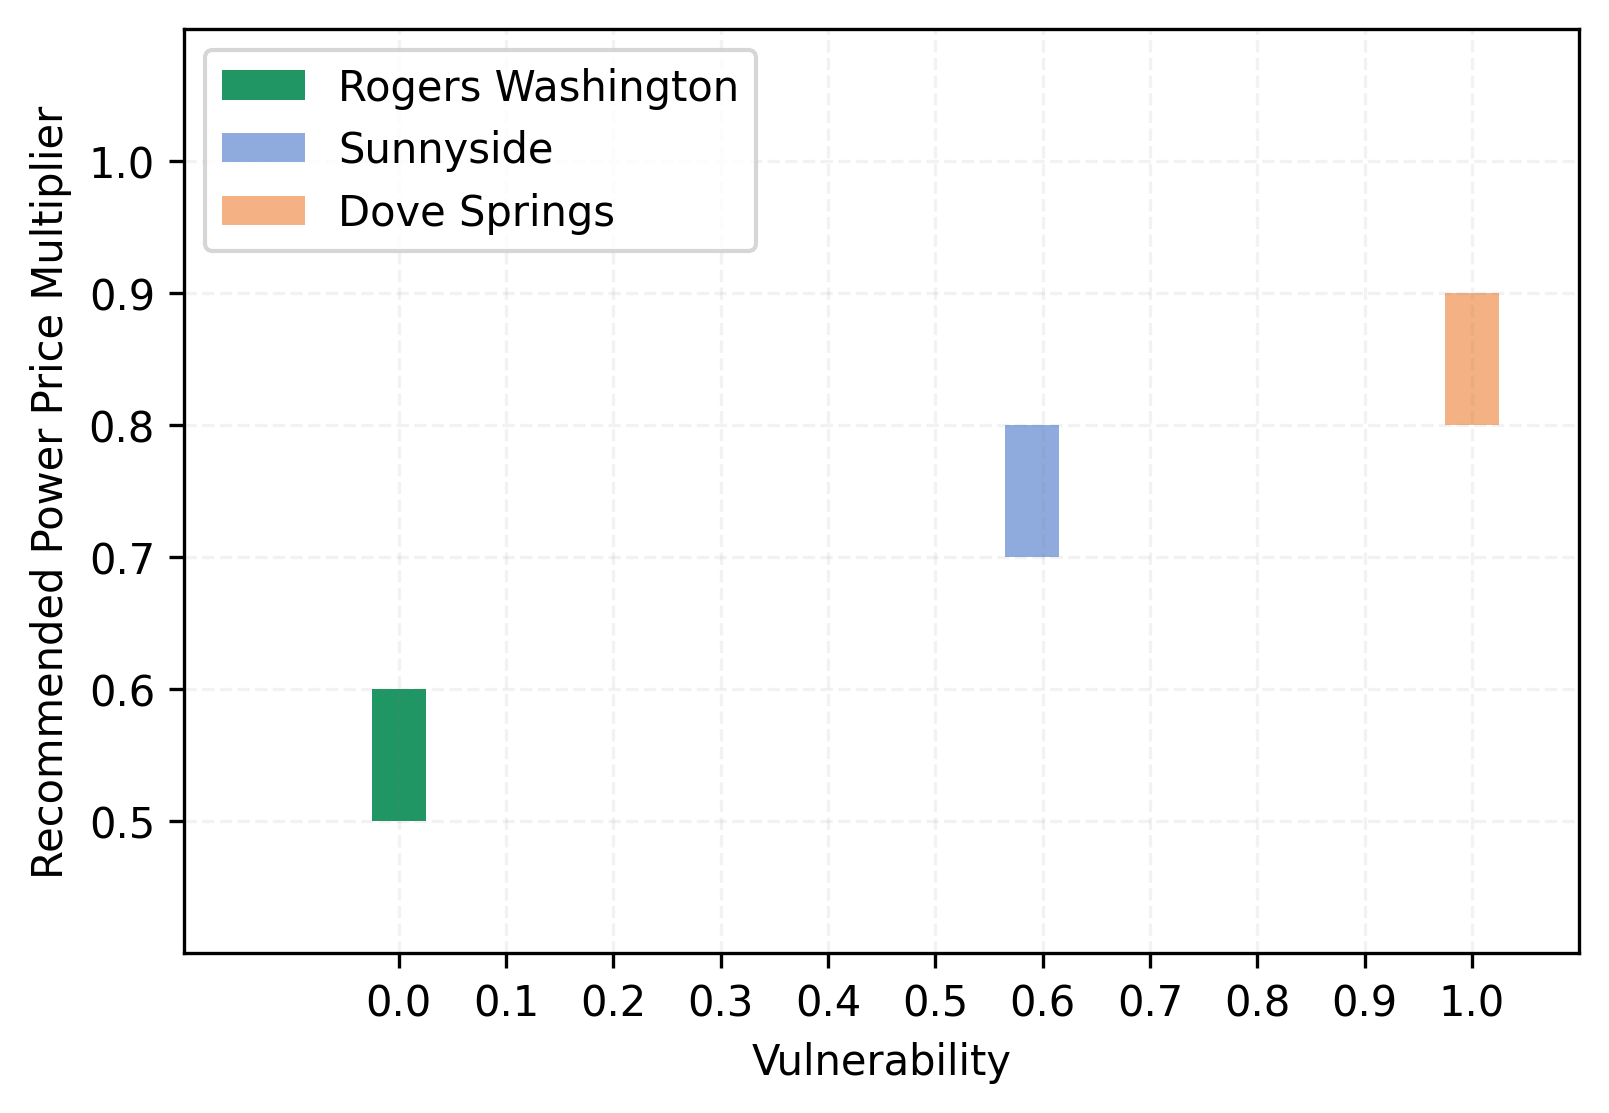

In [53]:
x_ = [0, 0.59, 1]
y_drp = [[0.25, 0.35], [0.25, 0.3], [0.2, 0.35]]
y_e = [[0.5, 0.6],[0.7, 0.8],[0.8, 0.9]]
y_bill = [[0.024, 0.0224], [0.2212, 0.2304], [0.1253, 0.1487]]

plt.figure(figsize=(6, 4), dpi=300)
plt.bar(x_[0], y_e[0][1]-y_e[0][0], bottom=y_e[0][0], color='#209665', width=0.05, label='Rogers Washington')  # Bar starting from y0 and continuing to y1
plt.bar(x_[1], y_e[1][1]-y_e[1][0], bottom=y_e[1][0], color='#8FAADC', width=0.05, label='Sunnyside')  # Bar starting from y0 and continuing to y1
plt.bar(x_[2], y_e[2][1]-y_e[2][0], bottom=y_e[2][0], color='#F4B183', width=0.05, label='Dove Springs')  # Bar starting from y0 and continuing to y1
plt.ylim([0.4, 1.1])
plt.xlim([-0.2,1.1])
plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0.5, 1, 6))
plt.grid(color='gray', linestyle='--', alpha=0.1)
plt.legend(loc='upper left')
plt.ylabel('Recommended Power Price Multiplier')
plt.xlabel('Vulnerability')
plt.savefig('../IMG/eprice_vs_vulner.jpg', bbox_inches='tight')